C:\Users\ADMINS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ADMINS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ADMINS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ADMINS\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


ความเร็วในการหมุนของมอเตอร์ที่เหมาะสมต่อการซักผ้า คือ : 7.611111111111112


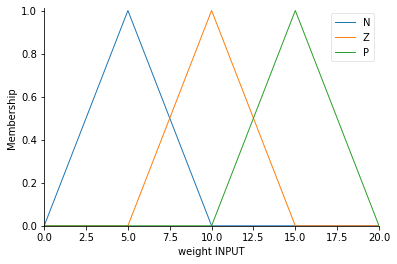

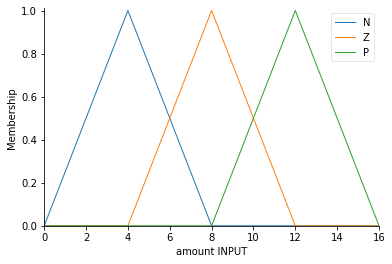

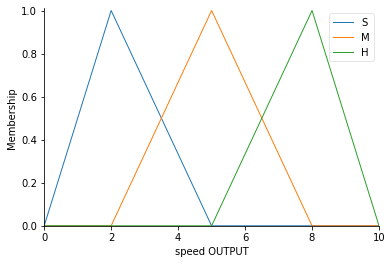

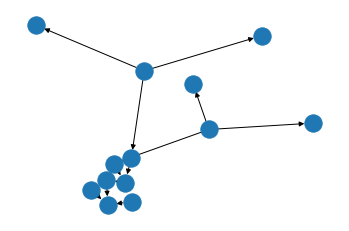

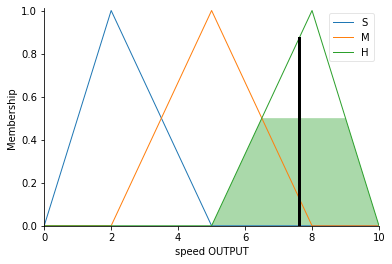

In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


WG = ctrl.Antecedent(np.arange(0, 21, 1), 'weight INPUT') #น้ำหนักนำเข้ามา
AM = ctrl.Antecedent(np.arange(0, 17, 1), 'amount INPUT') #ปริมาณนำเข้ามา
SP = ctrl.Consequent(np.arange(0, 11, 1), 'speed OUTPUT') #เเสดงผลค่าความเร็วที่ออกมา

#weight INPUT
WG['N'] = fuzz.trimf(WG.universe, [0, 5, 10]) 
WG['Z'] = fuzz.trimf(WG.universe, [5, 10, 15])
WG['P'] = fuzz.trimf(WG.universe, [10, 15, 20])

#amount INPUT
AM['N'] = fuzz.trimf(AM.universe, [0, 4, 8])
AM['Z'] = fuzz.trimf(AM.universe, [4, 8, 12])
AM['P'] = fuzz.trimf(AM.universe, [8, 12, 16])

#speed OUTPUT
SP['S'] = fuzz.trimf(SP.universe, [0, 2, 5])
SP['M'] = fuzz.trimf(SP.universe, [2, 5, 8])
SP['H'] = fuzz.trimf(SP.universe, [5, 8, 10])


WG.view()
AM.view()
SP.view()


# Column N
rule1 = ctrl.Rule(WG['N'] & AM['N'], SP['S'])
rule2 = ctrl.Rule(WG['N'] & AM['Z'], SP['M'])
rule3 = ctrl.Rule(WG['N'] & AM['P'], SP['M'])

# Column Z
rule4 = ctrl.Rule(WG['Z'] & AM['N'], SP['M'])
rule5 = ctrl.Rule(WG['Z'] & AM['Z'], SP['H'])
rule6 = ctrl.Rule(WG['Z'] & AM['P'], SP['H'])

# Column P
rule7 = ctrl.Rule(WG['P'] & AM['N'], SP['M'])
rule8 = ctrl.Rule(WG['P'] & AM['Z'], SP['H'])
rule9 = ctrl.Rule(WG['P'] & AM['P'], SP['H'])

rule1.view()
speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,
                                 rule4, rule5, rule6,
                                 rule7, rule8, rule9])

sping = ctrl.ControlSystemSimulation(speed_ctrl)

sping.input['weight INPUT'] = 15
sping.input['amount INPUT'] = 10


sping.compute()
SP.view(sim=sping)
print("ความเร็วในการหมุนของมอเตอร์ที่เหมาะสมต่อการซักผ้า คือ :", sping.output['speed OUTPUT'])
###ถวามเร็วที่คาดว่าเหมาะสม เเสดงผล 
#นำ codeเรื่องเเรก fuzzy control